In [180]:
import powergrasp
import pandas as pd
import numpy as np

In [2]:
import imp
imp.reload(powergrasp)

<module 'powergrasp' from '/Users/kibeom.kim/opt/anaconda3/lib/python3.7/site-packages/powergrasp/__init__.py'>

In [120]:
hits = pd.read_csv("ignore/all_hits_pvals_0526.csv", index_col=0)

In [121]:
hits = hits[['target','prey','pvals']]

In [16]:
hits[hits['target']=='ATL3']

,target,prey,pvals
15432,ATL3,YWHAQ,5.917869
15438,ATL3,REEP5,7.714926
15439,ATL3,YWHAH,7.366119
15440,ATL3,ATL2,56.719038
15437,ATL3,YWHAZ,27.786529
...,...,...,...
9649,ATL3,RABAC1,13.864455
9648,ATL3,RTN4,6.395328
9647,ATL3,ATL3,18.007060
9646,ATL3,MYO1C,4.008208


In [17]:
idx = hits.groupby(['target','prey'])['pvals'].transform(max) == hits['pvals']
hits = hits[idx]


In [23]:
hits = hits[hits['target'] != hits['prey']]

In [24]:
hits.to_csv('ignore/all_hits2_pvals_0526.csv')

In [25]:
import networkx

In [36]:
test = networkx.read_graphml("ignore/all_hits_pvals_0526.graphml")

In [48]:
networkx.write_graphml(test2,"ignore/u_all_hits_pvals_0526.graphml")

In [40]:
test2 = test.to_undirected()

In [47]:
test2.nodes['196826']

{'SUID': 196826,
 'shared name': 'HIST1H2BK',
 'name': 'HIST1H2BK',
 'selected': False}

In [44]:
i=10
for n in test2:
    print(n)
    i+=1
    if i ==10:
        break


200324
200321
200319
200317
200314
200312
200310
200307
200306
200303
200301
200289
200286
200284
200283
200278
200273
200261
200259
200256
200253
200249
200245
200243
200241
200238
200222
200220
200218
200216
200214
200211
200207
200201
200199
200192
200188
200186
200183
200180
200177
200174
200167
200162
200160
200151
200138
200136
200125
200121
200111
200100
200060
200055
200052
200050
200038
200036
200031
199983
199981
199977
199963
199956
199954
199916
199906
199900
199893
199888
199878
199874
199872
199867
199865
199861
199859
199857
199853
199850
199829
199788
199784
199760
199752
199735
199731
199703
199697
199682
199677
199666
199660
199656
199652
199641
199639
199636
199634
199630
199628
199617
199614
199605
199600
199597
199594
199591
199586
199584
199579
199573
199569
199564
199562
199560
199557
199555
199553
199551
199548
199546
199544
199542
199540
199536
199532
199529
199522
199520
199518
199516
199513
199509
199506
199496
199492
199490
199487
199445
199442
199438
19943

In [98]:
bioplex

,GeneA,GeneB,UniprotA,UniprotB,SymbolA,SymbolB,pW,pNI,pInt
0,100,728378,P00813,A5A3E0,ADA,POTEF,6.881844e-10,0.000118,0.999882
1,222389,6137,Q8N7W2-2,P26373,BEND7,RPL13,1.340380e-18,0.225664,0.774336
2,222389,5928,Q8N7W2-2,Q09028-3,BEND7,RBBP4,7.221401e-21,0.000064,0.999936
3,222389,25873,Q8N7W2-2,Q9Y3U8,BEND7,RPL36,7.058372e-17,0.128183,0.871817
4,222389,6124,Q8N7W2-2,P36578,BEND7,RPL4,1.632313e-22,0.200638,0.799362
...,...,...,...,...,...,...,...,...,...
118157,51805,2232,Q9NZJ6,P22570-2,COQ3,FDXR,8.609263e-03,0.124730,0.866660
118158,51805,80271,Q9NZJ6,Q96DU7,COQ3,ITPKC,4.227401e-04,0.002139,0.997439
118159,51805,55109,Q9NZJ6,Q8N302,COQ3,AGGF1,1.408362e-06,0.003469,0.996530
118160,51805,197258,Q9NZJ6,Q8N0W3-2,COQ3,FUK,2.112671e-01,0.006931,0.781802


In [52]:
hits.drop(columns='pvals',inplace=True)
hits['edge'] = 'EDGE'

In [55]:
hits = hits[['edge', 'target', 'prey']]

In [59]:
hits.to_csv('all_hits_0526.edg',header=False,index=False, sep= '\t')

In [97]:
bioplex = pd.read_csv('ignore/BioPlex_293T_Network_10K_Dec_2019.tsv', sep='\t')

In [87]:
bioplex= pd.read_csv("ignore/intersection_bioplex_0526.csv")

In [99]:
bioplex = bioplex[['SymbolA', 'SymbolB','pInt']]

In [67]:
oc = pd.read_csv("ignore/intersection_oc_0526.csv")

In [69]:
oc = oc[['target','prey']]

In [80]:
oc.to_csv('oc_ints_0526.edg',header=False,index=False, sep= '\t')

In [96]:
bioplex.to_csv('plex_all_0526.edg',header=False,index=False, sep= '\t')

In [74]:
oc['edge'] = 'EDGE'
bioplex['edge'] = 'EDGE'

In [76]:
oc = oc[['edge', 'target', 'prey']]

In [95]:
bioplex = bioplex[['edge', 'SymbolA', 'SymbolB']]

In [84]:
bioplex['SymbolA'].nunique()

561

In [85]:
oc['target'].nunique()

561

In [100]:
bioplex['edge'] = 'EDGE'

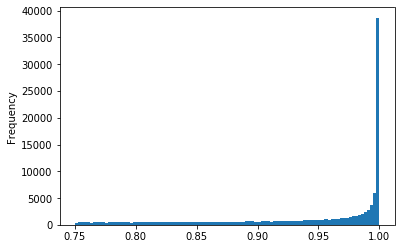

In [103]:
bioplex['pInt'].plot.hist(bins=100)

In [163]:
thresh = [0.85, 0.95, 0.99, 0.999]
plex_edges = []
for n in thresh:
    newplex = bioplex[bioplex['pInt']> n]
    newplex = newplex[['edge','SymbolA','SymbolB']]
    plex_edges.append(newplex.shape[0])
    # save_int = str(int(100*n))
    # save_name = 'plex_' + save_int + '_0526.edg'
    # newplex.to_csv(save_name,header=False,index=False, sep= '\t')

In [114]:
bioplex[bioplex['pInt']>.999]

,SymbolA,SymbolB,pInt,edge
0,ADA,POTEF,0.999882,EDGE
2,BEND7,RBBP4,0.999936,EDGE
7,BEND7,LRP4,0.999669,EDGE
8,BEND7,KPNA1,0.999971,EDGE
11,CCNI2,CDK5,0.999956,EDGE
...,...,...,...,...
118106,CEP89,MLLT1,0.999733,EDGE
118113,CHST5,DIEXF,0.999605,EDGE
118116,CHST5,CWC22,0.999772,EDGE
118125,CHST5,CHST6,1.000000,EDGE


In [106]:
bioplex

,SymbolA,SymbolB,pInt,edge
0,ADA,POTEF,0.999882,EDGE
1,BEND7,RPL13,0.774336,EDGE
2,BEND7,RBBP4,0.999936,EDGE
3,BEND7,RPL36,0.871817,EDGE
4,BEND7,RPL4,0.799362,EDGE
...,...,...,...,...
118157,COQ3,FDXR,0.866660,EDGE
118158,COQ3,ITPKC,0.997439,EDGE
118159,COQ3,AGGF1,0.996530,EDGE
118160,COQ3,FUK,0.781802,EDGE


In [170]:
plex_edges.append(118162)

In [165]:
plex_edges = plex_edges[::-1]

In [216]:
plex_edges = [6293, 9000, 14506]
plex_comp = [0.643, 0.609, 0.55 ]
# plex_thresh = [0.999, 0.99, 0.95, 0.85, 0.75]

# oc_edges = [23871, 12145, 5551]
# oc_comp = [0.625, 0.668, 0.692]
# oc_thresh = [0, 10, 20]

In [283]:
from numpy.polynomial.polynomial import polyfit


fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(plex_edges, plex_comp, s=30, label='bioplex')
b, m = polyfit(plex_edges, plex_comp, 1)
plt.plot(plex_edges, b+ m*plex_edges, '-')
plt.scatter(oc_edges, oc_comp, s=18, label='oc')
plt.scatter(marco_edges, marco_comp, s=18 ,label='Hein_2016')
plt.xlabel("# Interactions")
plt.ylabel('Edge Reduction (Compression)')
plt.xlim(0,30000)
plt.ylim(0,1)
# for x,y,z in zip(plex_edges, plex_comp, plex_thresh):
#     plt.annotate(str(z), (x,y), textcoords='offset points', xytext=(0,5),ha='center')
# for x,y,z in zip(oc_edges, oc_comp, oc_thresh):
#     plt.annotate(str(z), (x,y), textcoords='offset points', xytext=(0,5),ha='center')
_ = plt.title('Graph Compression at 1100 Targets')
_= plt.legend(fontsize=14)


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

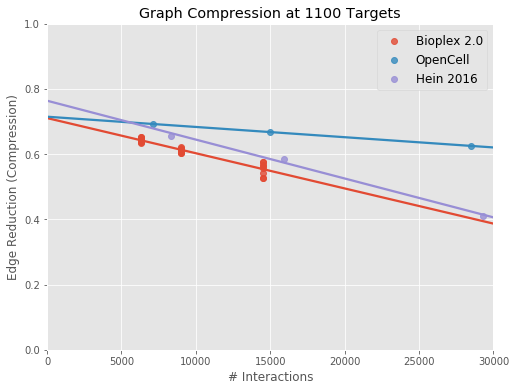

In [299]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,6))
plt.xlim(0,30000)
ax = sns.regplot(plex_edges, plex_comp, ci=None, label='Bioplex 2.0')
ax = sns.regplot(oc_edges, oc_comp, ci=None, label='OpenCell')
ax = sns.regplot(marco_edges, marco_comp, ci=None, label='Hein 2016')
plt.ylim(0,1)
plt.xlabel("# Interactions")
plt.ylabel('Edge Reduction (Compression)')
_ = plt.title('Graph Compression at 1100 Targets')
_= plt.legend(fontsize=12)

In [132]:
hits[hits['pvals']>10]

,target,prey,pvals
9275,AAMP,AAMP,29.134994
9276,AAMP,RPL10,16.147012
9277,AAMP,SUB1,10.098854
21074,AATF,NGDN,11.211890
21075,AATF,AATF,13.085858
...,...,...,...
12781,YY1,MSL2,20.079912
12778,YY1,ZNF644,13.760048
12784,YY1,INO80,30.285739
15731,ZCCHC9,ZCCHC9,58.132804


In [166]:
thresh = [0, 10, 20]
oc_edges = []
for n in thresh:
    newplex = hits[hits['pvals']> n]
    newplex['edge'] = 'EDGE'
    newplex = newplex[['edge','target','prey']]
    oc_edges.append(newplex.shape[0])
    # save_int = str(n)
    # save_name = 'oc_' + save_int + '_0526.edg'
    # newplex.to_csv(save_name,header=False,index=False, sep= '\t')

In [167]:
oc_edges

[28489, 14981, 7133]

In [162]:
hits.drop_duplicates()

,target,prey,pvals
9283,AAMP,SUPT16H,5.992182
9274,AAMP,PRPF40A,5.454796
9275,AAMP,AAMP,29.134994
9276,AAMP,RPL10,16.147012
9282,AAMP,ARGLU1,6.678316
...,...,...,...
12784,YY1,INO80,30.285739
12789,YY1,C17orf49,7.808784
19898,ZCCHC7,HSPA8,8.157431
15731,ZCCHC9,ZCCHC9,58.132804


In [160]:
bioplex[bioplex['pInt']> 0.999]

,SymbolA,SymbolB,pInt,edge
0,ADA,POTEF,0.999882,EDGE
2,BEND7,RBBP4,0.999936,EDGE
7,BEND7,LRP4,0.999669,EDGE
8,BEND7,KPNA1,0.999971,EDGE
11,CCNI2,CDK5,0.999956,EDGE
...,...,...,...,...
118106,CEP89,MLLT1,0.999733,EDGE
118113,CHST5,DIEXF,0.999605,EDGE
118116,CHST5,CWC22,0.999772,EDGE
118125,CHST5,CHST6,1.000000,EDGE


In [172]:
bioplex['SymbolA'].nunique()

8995

In [175]:
hits['target'].nunique()

1142

In [201]:
bioplex_targets = list(set(bioplex['SymbolA'].to_list()))

In [202]:
len(bioplex_targets)

8995

In [183]:
plex_range = np.arange(0,9000,1100)

In [184]:
plex_range

array([   0, 1100, 2200, 3300, 4400, 5500, 6600, 7700, 8800])

In [214]:
means = []
for i,lim in enumerate(plex_range):
    if i == 0:
        continue
    selected = bioplex_targets[plex_range[i-1]:lim]
    newplex = bioplex[bioplex['SymbolA'].isin(selected)]
    # newplex = newplex[newplex['pInt'] > 0.99]
    means.append(newplex.shape[0])
    # newplex = newplex[['edge','SymbolA','SymbolB']]
    # save_int = str(lim)
    # save_name = 'ignore/sorted95_plex_' + save_int + '_0526.edg'
    # newplex.to_csv(save_name,header=False,index=False, sep= '\t')
np.mean(means)

14506.0

In [208]:
plex_edges = [6293, 9000, 14506]
plex_comp = [0.643, 0.609, 0.55 ]

,SymbolA,SymbolB,pInt,edge
30,HSPBP1,HSPA8,0.983344,EDGE
31,HSPBP1,POTEF,0.825112,EDGE
32,HSPBP1,C10orf137,0.999980,EDGE
33,HSPBP1,NT5C2,1.000000,EDGE
34,HSPBP1,ELF2,0.839479,EDGE
...,...,...,...,...
118035,SERPINI2,LEPR,0.996222,EDGE
118060,XRCC6BP1,PEAK1,0.999994,EDGE
118061,XRCC6BP1,JMJD4,0.991247,EDGE
118062,XRCC6BP1,RFWD2,0.999811,EDGE


In [193]:
hits['target'].nunique()

1142

In [234]:
plex_75 = [0.568, 0.557, 0.575, 0.564, 0.543, 0.577, 0.527, 0.526]
p1 = [14506]* 8
plex_99 = [0.633, 0.653, 0.636, 0.642, 0.638, 0.6475, 0.6495,0.652]
p2 = [6293] * 8
plex_95 = [0.621, 0.605, 0.604, 0.6036, 0.6125, 0.616, 0.611, 0.619]
p3 = [9000] * 8

In [235]:
plex_edges = p1 + p2 + p3
plex_comp = plex_75 + plex_99 + plex_95

In [236]:
len(plex_comp)

24

In [199]:
np.mean([12237,
14369,
13200,
16864,
14679,
13225,
17469,
13707])

14468.75

In [204]:
np.mean([14868,
14399,
15804,
14024,
13765,
15425,
14294,
13469])

14506.0

In [200]:
(0.566 + 0.551 + 0.540 + 0.556 + 0.550+0.544 + 0.545+ 0.553) / 8

0.550625

In [ ]:
6471
6159
6764
5980
6113
6717
6153
5988

In [503]:
marco = pd.read_excel('ignore/marco_data.xlsx')

In [504]:
marco = marco[['bait.Gene.name','prey.Gene.name','interactor.confidence.class']]

In [257]:
marco['interactor.confidence.class'].unique()

array(['B', 'B-', 'A+', 'A', 'A-', 'C+', 'B+', 'C'], dtype=object)

In [266]:
ab = ['A+','A','A-','B+']
a = ['A+']

In [269]:
selection = marco[marco['interactor.confidence.class'].isin(ab)]
selection = selection[['bait.Gene.name','prey.Gene.name']].drop_duplicates()
selection['edge'] = 'EDGE'
selection = selection[['edge','bait.Gene.name','prey.Gene.name']]
print(selection.shape)
selection.to_csv('marco_abs.edg',header=False,index=False, sep= '\t')

(15951, 3)


In [272]:
15951
8334 
marco_edges = [29315, 15951, 8334]
marco_comp = [0.410, 0.585, 0.657]

In [245]:
marco = marco[['bait.Gene.name','prey.Gene.name']].drop_duplicates()

In [247]:
marco[['bait.Gene.name']].nunique()

bait.Gene.name    1126
dtype: int64

In [249]:
marco['edge'] = 'EDGE'

In [251]:
marco = marco[['edge','bait.Gene.name','prey.Gene.name']]

In [253]:
marco.to_csv('marco_all.edg',header=False,index=False, sep= '\t')

In [306]:
p0428 = pd.read_pickle('ignore/old_pickles/all_interactions_0428.pickle')

In [309]:
p0428['edge'] = 'EDGE'
p0428 = p0428[['edge','target','prey']]
p0428.drop_duplicates(inplace=True)

In [310]:
p0428.to_csv('p0428.edg',header=False,index=False, sep= '\t')

In [311]:
p0428

,edge,target,prey
0,EDGE,ARHGAP1,EPB41L2
1,EDGE,ARHGAP1,EPB41
2,EDGE,ARHGAP1,SIPA1L3
3,EDGE,ARHGAP1,RHOC
4,EDGE,ARHGAP1,ARHGAP1
...,...,...,...
30327,EDGE,HDAC1,ZHX1
30328,EDGE,HDAC1,ZMYND8
30331,EDGE,HDAC1,CDYL
30332,EDGE,HDAC1,UTP18


In [313]:
hits[['target','prey']].drop_duplicates()

,target,prey
9283,AAMP,SUPT16H
9274,AAMP,PRPF40A
9275,AAMP,AAMP
9276,AAMP,RPL10
9282,AAMP,ARGLU1
...,...,...
12784,YY1,INO80
12789,YY1,C17orf49
19898,ZCCHC7,HSPA8
15731,ZCCHC9,ZCCHC9


In [314]:
plex1 = pd.read_excel('ignore/bioplex1.xlsx')

In [316]:
plexc = plex1[['Symbol A', 'Symbol B']]

In [319]:
plexc['edge'] = 'EDGE'
plexc = plexc[['edge', 'Symbol A', 'Symbol B']]
plexc.to_csv('plex_one_all.edg',header=False,index=False, sep= '\t')

In [320]:
plexc

,edge,Symbol A,Symbol B
0,EDGE,ZWINT,STX18
1,EDGE,ZWINT,SPC25
2,EDGE,ZWINT,SPC24
3,EDGE,ZWINT,RRBP1
4,EDGE,ZWINT,PMF1
...,...,...,...
23739,EDGE,A4GALT,LOC100510688
23740,EDGE,A4GALT,ICK
23741,EDGE,A4GALT,FCGRT
23742,EDGE,A4GALT,FAM108B1


In [321]:
import random

In [329]:
k = [0,1,2,3,4]
y = random.sample(k, len(k))

In [330]:
k

[0, 1, 2, 3, 4]

In [331]:
y

[3, 2, 4, 1, 0]

In [333]:
import compression

In [345]:
for i in np.arange(5):
    save_name = 'plextwo_null_' + str(i) + '.edg'
    compression.create_null_edg(bioplex, 'SymbolA', 'SymbolB', save_name)

In [344]:
bioplex

,SymbolA,SymbolB,pInt,edge
0,ADA,POTEF,0.999882,EDGE
1,BEND7,RPL13,0.774336,EDGE
2,BEND7,RBBP4,0.999936,EDGE
3,BEND7,RPL36,0.871817,EDGE
4,BEND7,RPL4,0.799362,EDGE
...,...,...,...,...
118157,COQ3,FDXR,0.866660,EDGE
118158,COQ3,ITPKC,0.997439,EDGE
118159,COQ3,AGGF1,0.996530,EDGE
118160,COQ3,FUK,0.781802,EDGE


In [347]:
huri= pd.read_csv('ignore/huri.csv')

In [349]:
huri
for i in np.arange(5):
    save_name = 'huri_null_' + str(i) + '.edg'
    compression.create_null_edg(huri, 'target', 'prey', save_name)

In [351]:
compression.create_edg(huri, 'target', 'prey', save_name='huri.edg')

In [354]:
oc = 0.626
oc_null = np.mean([0.3025, 0.3014, 0.3016, 0.3023, 0.3031, 0.3025])
rel_oc = oc-oc_null

marco = 0.41
marco_null = np.mean([0.238, 0.237, 0.237, 0.237, 0.237])
rel_marco = marco-marco_null

plex_one = 0.4577
plex_one_null = np.mean([0.299, 0.297, 0.300, 0.298, 0.297])
rel_p1 = plex_one - plex_one_null


plex_two = 0.304
plex_two_null = np.mean([0.140, 0.139, 0.140, 0.140, 0.140])
rel_p2 = plex_two - plex_two_null

huri_ = 0.301
huri_null = np.mean([0.187, 0.190, 0.190, 0.190, 0.189])
rel_huri = huri_ - huri_null

In [376]:
rel_huri

0.11180000000000001

Text(0.5, 0, 'Absolute Compression')

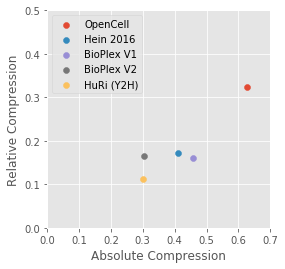

In [371]:
fig, ax = plt.subplots(figsize=(4,4))
plt.scatter(oc,rel_oc,label='OpenCell')
plt.scatter(marco,rel_marco,label='Hein 2016')
plt.scatter(plex_one,rel_p1,label='BioPlex V1')
plt.scatter(plex_two, rel_p2,label='BioPlex V2')
plt.scatter(huri_, rel_huri,label='HuRi (Y2H)')
plt.legend(loc='upper left')
plt.ylim(0,0.5)
plt.xlim(0,0.7)
plt.ylabel('Relative Compression')
plt.xlabel('Absolute Compression')

In [378]:
coes = pd.read_excel('ignore/coessential.xlsx')

In [382]:
coes

,Module #,d,Heatmap URL,Synteny,Most-enriched GO term,Most-enriched enrichment,Most-enriched p,2nd-most-enriched GO term,2nd-most-enriched enrichment,2nd-most-enriched p,...,Unnamed: 722,Unnamed: 723,Unnamed: 724,Unnamed: 725,Unnamed: 726,Unnamed: 727,Unnamed: 728,Unnamed: 729,Unnamed: 730,Unnamed: 731
0,1,0.2,mitra.stanford.edu/bassik/michael/cluster_heat...,Non-syntenic,molecular function:complement receptor activity,15.72740,4.280000e-07,biological process:complement receptor mediate...,12.867870,2.190000e-06,...,ZNF836,ZNF841,ZNF850,ZNF865,ZNF880,ZSCAN1,ZSCAN18,ZSCAN22,ZSCAN5A,ZSCAN5B
1,2,0.2,mitra.stanford.edu/bassik/michael/cluster_heat...,Non-syntenic,molecular function:lipase activity,19.50216,1.320000e-09,biological process:cellular lipid metabolic pr...,12.045450,5.770000e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.2,mitra.stanford.edu/bassik/michael/cluster_heat...,Non-syntenic,cellular component:keratin filament,9.31978,3.270000e-17,biological process:cornification,7.145165,8.140000e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.2,mitra.stanford.edu/bassik/michael/cluster_heat...,Non-syntenic,molecular function:ketosteroid monooxygenase a...,30.28929,2.350000e-06,molecular function:carboxylic acid binding,23.663500,6.590000e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.2,mitra.stanford.edu/bassik/michael/cluster_heat...,Non-syntenic,biological process:homophilic cell adhesion vi...,13.98982,5.190000e-47,biological process:calcium-dependent cell-cell...,11.338240,8.270000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,5225,0.9,mitra.stanford.edu/bassik/michael/cluster_heat...,Syntenic,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5225,5226,0.9,mitra.stanford.edu/bassik/michael/cluster_heat...,Syntenic,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5226,5227,0.9,mitra.stanford.edu/bassik/michael/cluster_heat...,Syntenic,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5227,5228,0.9,mitra.stanford.edu/bassik/michael/cluster_heat...,Syntenic,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [417]:
co = coes.copy()

In [418]:
co_cols = list(co)[13:]

In [419]:
co = co.drop(columns=co_cols)

In [401]:
cos

,Genes,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,...,Unnamed: 722,Unnamed: 723,Unnamed: 724,Unnamed: 725,Unnamed: 726,Unnamed: 727,Unnamed: 728,Unnamed: 729,Unnamed: 730,Unnamed: 731
0,A1BG,ACOT4,ACPT,ACTN4,ADCK4,ADM5,AKT1S1,AKT2,ALDH16A1,ALKBH6,...,ZNF836,ZNF841,ZNF850,ZNF865,ZNF880,ZSCAN1,ZSCAN18,ZSCAN22,ZSCAN5A,ZSCAN5B
1,A1CF,ABCC2,ABLIM1,ACADSB,ACSL5,ACSM6,ACTA2,ADAMTS14,ADD3,ADIRF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AACS,ABCB9,ABCD2,ACACB,ACAD10,ACADS,ACSS3,ACVR1B,ACVRL1,ADAMTS20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A1CF,ABCC2,ABLIM1,ACBD5,ACBD7,ACSM6,ACTA2,ADAMTS14,ADARB2,ADIRF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABLIM3,ACOT12,ACSL6,ACTBL2,ADAM12,ADAMTS19,ADAMTS6,ADCYAP1R1,ADORA2A,ADRA1B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,C16orf90,CCDC64B,CDIP1,CLUAP1,CORO7,DNASE1,GLIS2,MMP25,NMRAL1,PAQR4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5225,CGB2,KIR2DL1,LAIR2,PSG2,PTPRH,SHISA7,ZSCAN5A,ZSCAN5B,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5226,BPIFA3,BPIFB1,BPIFB4,CDK5RAP1,CPNE1,DNMT3B,DUSP15,FAM83C,GDF5,GHRH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5227,CD97,CLEC17A,OR7C2,ZSWIM4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [408]:
cos = cos.T


In [461]:
genes = []
cols = list(cos)
for col in cols:
    gene = cos[col].to_list()
    gene = [x for x in gene if x != np.nan]
    gene = [x for x in gene if type(x) == str]
    genes.append(gene)

In [462]:
len(genes)

5229

In [463]:
co['genes'] = genes

In [464]:
co.to_pickle('coessential.pkl')

In [465]:
coes = co['genes']

In [467]:
coes[5227]

['CD97', 'CLEC17A', 'OR7C2', 'ZSWIM4']

In [468]:
coes

0       [A1BG, ACOT4, ACPT, ACTN4, ADCK4, ADM5, AKT1S1...
1       [A1CF, ABCC2, ABLIM1, ACADSB, ACSL5, ACSM6, AC...
2       [AACS, ABCB9, ABCD2, ACACB, ACAD10, ACADS, ACS...
3       [A1CF, ABCC2, ABLIM1, ACBD5, ACBD7, ACSM6, ACT...
4       [ABLIM3, ACOT12, ACSL6, ACTBL2, ADAM12, ADAMTS...
                              ...                        
5224    [C16orf90, CCDC64B, CDIP1, CLUAP1, CORO7, DNAS...
5225    [CGB2, KIR2DL1, LAIR2, PSG2, PTPRH, SHISA7, ZS...
5226    [BPIFA3, BPIFB1, BPIFB4, CDK5RAP1, CPNE1, DNMT...
5227                       [CD97, CLEC17A, OR7C2, ZSWIM4]
5228    [BNIP1, C19orf25, NAPG, NBAS, RAB18, RINT1, SC...
Name: genes, Length: 5229, dtype: object

In [470]:
hits

,target,prey,pvals
9283,AAMP,SUPT16H,5.992182
9274,AAMP,PRPF40A,5.454796
9275,AAMP,AAMP,29.134994
9276,AAMP,RPL10,16.147012
9282,AAMP,ARGLU1,6.678316
...,...,...,...
12784,YY1,INO80,30.285739
12789,YY1,C17orf49,7.808784
19898,ZCCHC7,HSPA8,8.157431
15731,ZCCHC9,ZCCHC9,58.132804


In [471]:
test = hits[['target', 'prey']]

In [472]:
test['target'].apply(lambda)

,target,prey
9283,AAMP,SUPT16H
9274,AAMP,PRPF40A
9275,AAMP,AAMP
9276,AAMP,RPL10
9282,AAMP,ARGLU1
...,...,...
12784,YY1,INO80
12789,YY1,C17orf49
19898,ZCCHC7,HSPA8
15731,ZCCHC9,ZCCHC9


In [495]:
def calculate_coessentiality(db, coes, target_col, prey_col):
    db = db.copy()
    coes_num = 0

    target_list = list(set(db[target_col]))
    target_list.sort()
    for target in target_list:
        target_edges = set(db[db[target_col] == target][prey_col].to_list())
        coes_edges = coes[coes.apply(lambda x: True if target in x else False)].to_list()
        coes_edges = set(list(itertools.chain.from_iterable(coes_edges)))
        intersect = target_edges.intersection(coes_edges)
        intersect_num = len(intersect)
        coes_num += intersect_num
    
    return coes_num / db.shape[0]

In [496]:
calculate_coessentiality(hits, coes, 'target','prey')

0.14593231488926248

In [498]:
calculate_coessentiality(plex1, coes, 'Symbol A','Symbol B')

0.08309467654986523

In [500]:
calculate_coessentiality(bioplex, coes, 'SymbolA','SymbolB')

0.06846532726257172

In [506]:
calculate_coessentiality(marco, coes, 'bait.Gene.name','prey.Gene.name')

0.12211995992987729

In [509]:
rel_comp= [rel_oc, rel_marco, rel_p1, rel_p2]
coes_vals = [0.1459, 0.1221, 0.0831, 0.0685]

In [529]:
hits.shape[0] * 0.1459

3992.1158

In [530]:
marco.shape[0] * 0.1221

3900.3624

In [535]:
plex1.shape[0] 

23744

In [534]:
bioplex.shape[0] 

118162

In [533]:
marco.shape[0]

31944

Text(0.5, 0, 'Proportion of interactions in Coessential Groups')

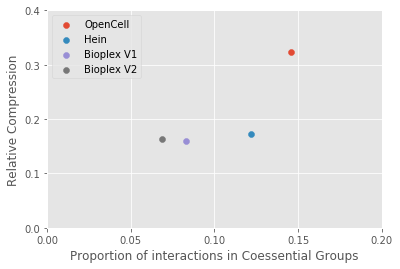

In [527]:
fig, ax = plt.subplots()
plt.ylim(0,0.2)
plt.xlim(0,0.2)
plt.yticks(np.arange(0,0.45,0.1))
plt.xticks(np.arange(0,0.25, 0.05))
plt.scatter(0.1459, rel_oc, label='OpenCell')
plt.scatter(0.1221, rel_marco,  label='Hein')
plt.scatter(0.0831, rel_p1,  label="Bioplex V1")
plt.scatter(0.0685, rel_p2,  label='Bioplex V2')
plt.legend()
plt.ylabel('Relative Compression')
plt.xlabel('Proportion of interactions in Coessential Groups')

In [483]:
test1 = coes[coes.apply(lambda x: True if 'AAMP' in x else False)].to_list()

In [489]:
import itertools
test2 = set(list(itertools.chain.from_iterable(test1)))

In [491]:
'AAMP' in test2

True

In [494]:
hits = hits[hits['target'] != hits['prey']]